In [1]:
# adjsut the basic logging lovel of notebook
import logging
logging.basicConfig(level=logging.WARNING)

import os
import yaml
import numpy as np
import pandas as pd
import scipy as scp
import pickle
import matplotlib.pyplot as plt
import matplotlib as mpl
# import seaborn as sns
from matplotlib.lines import Line2D
from palettable.colorbrewer import qualitative

import auditory_cortex.analysis as analysis
from auditory_cortex import results_dir, aux_dir, saved_corr_dir
from auditory_cortex.utils import CorrelationUtils

from pycolormap_2d import ColorMap2DBremm, ColorMap2DZiegler
%matplotlib inline

### separate reporting for core and belt...

Baseline median: 0.096


Text(0.5, 1.0, 'wave2letter_modified_neural_delay_only, area-belt')

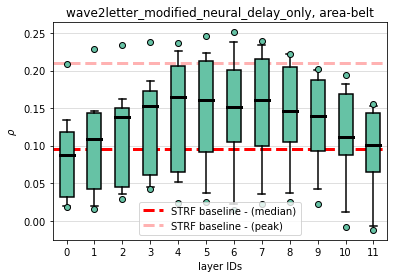

In [28]:
from auditory_cortex import area_to_sessions

corr_results = 'wave2letter_modified_neural_delay_only'
# corr_results = 'wave2letter_modified'
corr_obj = analysis.Correlations(corr_results)

area = 'core'
area = 'belt'

sessions = area_to_sessions[area]
ax, layer_spread = corr_obj.box_plot_correlations(
    sessions=sessions,
    threshold=0.08
)
ax.set_title(f"{corr_results}, area-{area}")

In [21]:
for k,v in layer_spread.items():
    print(f"Layer-{k}", end=', ')
    print(f"Median: {np.median(v):.2f}", end=", ")
    print(f"Max: {np.max(v):.2f}")

Layer-0, Median: 0.12, Max: 0.47
Layer-1, Median: 0.18, Max: 0.56
Layer-2, Median: 0.20, Max: 0.58
Layer-3, Median: 0.22, Max: 0.59
Layer-4, Median: 0.23, Max: 0.60
Layer-5, Median: 0.22, Max: 0.65
Layer-6, Median: 0.23, Max: 0.65
Layer-7, Median: 0.23, Max: 0.64
Layer-8, Median: 0.21, Max: 0.58
Layer-9, Median: 0.20, Max: 0.56
Layer-10, Median: 0.18, Max: 0.50
Layer-11, Median: 0.15, Max: 0.46


In [28]:
# session = 200206
# select_data = corr_obj.get_session_data(
#                 session=session,
#                 bin_width=20, delay=0, N_sents=499,
#                 threshold=0.1
#             )

select_data = corr_obj.data

In [36]:
sessions = [200206, 1555500]
sub_data = []
for session in sessions:
    sub_data.append(select_data[select_data['session']==session])
dd = pd.concat(sub_data)

In [37]:
dd['session'].unique()

array([200206.])

In [30]:
len(select_data['session'].unique())

45

Baseline median: 0.183


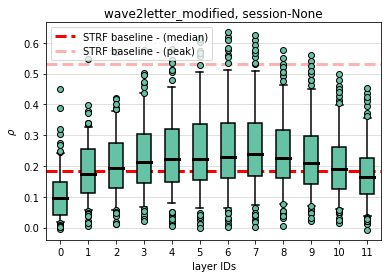

In [5]:
ax = corr_obj.box_plot_correlations(
    threshold=0.1
)

### plotting sig. recording sites..

In [2]:
normalizer_results = 'wave2letter_modified_normalizer2'
corr_obj = analysis.Correlations(normalizer_results)

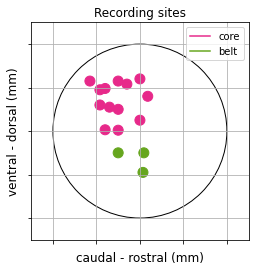

In [7]:
legend_handles = []
color_options = qualitative.Dark2_8.mpl_colors
ax = corr_obj.plot_session_coordinates(
        # subject_specific_color=True,
        core_belt_color=True,
        dot_size=100,
        threshold=0.08
        )
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_title(f"Recording sites")
legend_handles.append(Line2D([0], [0], label='core', color=color_options[3]))
legend_handles.append(Line2D([0], [0], label='belt', color=color_options[4]))
plt.legend(handles = legend_handles)


### delete after watching...

In [2]:
from auditory_cortex import STRF

session = 200206
strf = STRF.STRF(session)


Loading Neural data for session: 200206 ... Done.


In [3]:
out = strf.get_sample(sent=12, third=1)

(69, 128)
(23, 128)


In [8]:
strf.dataset.audio(12).shape

(21914,)

In [4]:
out[0].shape

(23, 32)

In [5]:
out[1].shape

(23, 64)